In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [3]:
from optimus import Optimus

In [4]:
op= Optimus(verbose=True)

INFO:optimus:Just check that Spark and all necessary environments vars are present...
INFO:optimus:-----
INFO:optimus:SPARK_HOME=C:\opt\spark\spark-2.3.1-bin-hadoop2.7
INFO:optimus:HADOOP_HOME=C:\opt\spark\spark-2.3.1-bin-hadoop2.7
INFO:optimus:PYSPARK_PYTHON=C:\Users\argenisleon\Anaconda3\python.exe
INFO:optimus:PYSPARK_DRIVER_PYTHON=jupyter
INFO:optimus:PYSPARK_SUBMIT_ARGS=--conf "spark.sql.catalogImplementation=hive" pyspark-shell
INFO:optimus:JAVA_HOME=C:\java
INFO:optimus:Pyarrow Installed
INFO:optimus:-----
INFO:optimus:Starting or getting SparkSession and SparkContext...
INFO:optimus:Spark Version:2.3.1
INFO:optimus:
                             ____        __  _                     
                            / __ \____  / /_(_)___ ___  __  _______
                           / / / / __ \/ __/ / __ `__ \/ / / / ___/
                          / /_/ / /_/ / /_/ / / / / / / /_/ (__  ) 
                          \____/ .___/\__/_/_/ /_/ /_/\__,_/____/  
                            

In [5]:
import pandas as pd
from pyspark.sql.types import *
from datetime import date, datetime

df = op.create.df(
    [
        "names", 
        "height(ft)", 
        "function", 
        "rank", 
        "age",
        "weight(t)",
        "japanese name",
        "last position seen",
        "date arrival",
        "last date seen",
        "attributes",
        "DateType",
        "Tiemstamp",
        "Cybertronian", 
        "function(binary)",
        "NullType",

    ],
    [
        ("Optim'us", 28, "Leader", 10, 5000000, 4.30, ["Inochi", "Convoy"], "19.442735,-99.201111", "1980/04/10",
         "2016/09/10", [8.5344, 4300.0], date(2016, 9, 10), datetime(2014, 6, 24), True, bytearray("Leader", "utf-8"),
         None),
        ("bumbl#ebéé  ", 17, "Espionage", 7, 5000000, 2.0, ["Bumble", "Goldback"], "10.642707,-71.612534", "1980/04/10",
         "2015/08/10", [5.334, 2000.0], date(2015, 8, 10), datetime(2014, 6, 24), True, bytearray("Espionage", "utf-8"),
         None),
        ("ironhide&", 26, "Security", 7, 5000000, 4.0, ["Roadbuster"], "37.789563,-122.400356", "1980/04/10",
         "2014/07/10", [7.9248, 4000.0], date(2014, 6, 24), datetime(2014, 6, 24), True, bytearray("Security", "utf-8"),
         None),
        ("Jazz", 13, "First Lieutenant", 8, 5000000, 1.80, ["Meister"], "33.670666,-117.841553", "1980/04/10",
         "2013/06/10", [3.9624, 1800.0], date(2013, 6, 24), datetime(2014, 6, 24), True,
         bytearray("First Lieutenant", "utf-8"), None),
        ("Megatron", None, "None", 10, 5000000, 5.70, ["Megatron"], None, "1980/04/10", "2012/05/10", [None, 5700.0],
         date(2012, 5, 10), datetime(2014, 6, 24), True, bytearray("None", "utf-8"), None),
        ("Metroplex_)^$", 300, "Battle Station", 8, 5000000, None, ["Metroflex"], None, "1980/04/10", "2011/04/10",
         [91.44, None], date(2011, 4, 10), datetime(2014, 6, 24), True, bytearray("Battle Station", "utf-8"), None),

    ], infer_schema = True).h_repartition(1)
df.table()

names 1 (string) nullable,height(ft) 2 (int) nullable,function 3 (string) nullable,rank 4 (int) nullable,age 5 (int) nullable,weight(t) 6 (float) nullable,japanese name 7 (array<string>) nullable,last position seen 8 (string) nullable,date arrival 9 (string) nullable,last date seen 10 (string) nullable,attributes 11 (array<float>) nullable,DateType 12 (date) nullable,Tiemstamp 13 (timestamp) nullable,Cybertronian 14 (boolean) nullable,function(binary) 15 (binary) nullable,NullType 16 (null) nullable
Optim'us,28,Leader,10,5000000,4.300000190734863,"['Inochi',⸱'Convoy']","19.442735,-99.201111",1980/04/10,2016/09/10,"[8.53439998626709,⸱4300.0]",2016-09-10,2014-06-24⸱00:00:00,True,bytearray(b'Leader'),None
bumbl#ebéé⸱⸱,17,Espionage,7,5000000,2.0,"['Bumble',⸱'Goldback']","10.642707,-71.612534",1980/04/10,2015/08/10,"[5.334000110626221,⸱2000.0]",2015-08-10,2014-06-24⸱00:00:00,True,bytearray(b'Espionage'),None
ironhide&,26,Security,7,5000000,4.0,['Roadbuster'],"37.789563,-122.400356",1980/04/10,2014/07/10,"[7.924799919128418,⸱4000.0]",2014-06-24,2014-06-24⸱00:00:00,True,bytearray(b'Security'),None
Jazz,13,First⸱Lieutenant,8,5000000,1.7999999523162842,['Meister'],"33.670666,-117.841553",1980/04/10,2013/06/10,"[3.962399959564209,⸱1800.0]",2013-06-24,2014-06-24⸱00:00:00,True,bytearray(b'First⸱Lieutenant'),None
Megatron,None,None,10,5000000,5.699999809265137,['Megatron'],None,1980/04/10,2012/05/10,"[None,⸱5700.0]",2012-05-10,2014-06-24⸱00:00:00,True,bytearray(b'None'),None
Metroplex_)^$,300,Battle⸱Station,8,5000000,None,['Metroflex'],None,1980/04/10,2011/04/10,"[91.44000244140625,⸱None]",2011-04-10,2014-06-24⸱00:00:00,True,bytearray(b'Battle⸱Station'),None


In [74]:
df.cols.z_score("height(ft)","z_score").table()

INFO:optimus:Using 'column_exp' to process column 'height(ft)' with function _z_score


names 1 (string) nullable,height(ft) 2 (int) nullable,function 3 (string) nullable,rank 4 (int) nullable,age 5 (int) nullable,weight(t) 6 (float) nullable,japanese name 7 (array<string>) nullable,last position seen 8 (string) nullable,date arrival 9 (string) nullable,last date seen 10 (string) nullable,attributes 11 (array<float>) nullable,DateType 12 (date) nullable,Tiemstamp 13 (timestamp) nullable,Cybertronian 14 (boolean) nullable,function(binary) 15 (binary) nullable,NullType 16 (null) nullable,z_score 17 (double) nullable
Optim'us,28,Leader,10,5000000,4.300000190734863,"['Inochi',⸱'Convoy']","19.442735,-99.201111",1980/04/10,2016/09/10,"[8.53439998626709,⸱4300.0]",2016-09-10,2014-06-24⸱00:00:00,True,bytearray(b'Leader'),None,0.3906288147345189
bumbl#ebéé⸱⸱,17,Espionage,7,5000000,2.0,"['Bumble',⸱'Goldback']","10.642707,-71.612534",1980/04/10,2015/08/10,"[5.334000110626221,⸱2000.0]",2015-08-10,2014-06-24⸱00:00:00,True,bytearray(b'Espionage'),None,0.47868039182631617
ironhide&,26,Security,7,5000000,4.0,['Roadbuster'],"37.789563,-122.400356",1980/04/10,2014/07/10,"[7.924799919128418,⸱4000.0]",2014-06-24,2014-06-24⸱00:00:00,True,bytearray(b'Security'),None,0.4066381923875729
Jazz,13,First⸱Lieutenant,8,5000000,1.7999999523162842,['Meister'],"33.670666,-117.841553",1980/04/10,2013/06/10,"[3.962399959564209,⸱1800.0]",2013-06-24,2014-06-24⸱00:00:00,True,bytearray(b'First⸱Lieutenant'),None,0.5106991471324243
Megatron,None,None,10,5000000,5.699999809265137,['Megatron'],None,1980/04/10,2012/05/10,"[None,⸱5700.0]",2012-05-10,2014-06-24⸱00:00:00,True,bytearray(b'None'),None,None
Metroplex_)^$,300,Battle⸱Station,8,5000000,None,['Metroflex'],None,1980/04/10,2011/04/10,"[91.44000244140625,⸱None]",2011-04-10,2014-06-24⸱00:00:00,True,bytearray(b'Battle⸱Station'),None,1.7866465460808323


In [105]:
df.cols.unnest("japanese name", output_cols = "temp").table()
df.cols.unnest("date arrival", separator = "/", output_cols = "fecha").table()

names 1 (string) nullable,height(ft) 2 (int) nullable,function 3 (string) nullable,rank 4 (int) nullable,age 5 (int) nullable,weight(t) 6 (float) nullable,japanese name 7 (array<string>) nullable,last position seen 8 (string) nullable,date arrival 9 (string) nullable,last date seen 10 (string) nullable,attributes 11 (array<float>) nullable,DateType 12 (date) nullable,Tiemstamp 13 (timestamp) nullable,Cybertronian 14 (boolean) nullable,function(binary) 15 (binary) nullable,NullType 16 (null) nullable,temp_0 17 (string) nullable,temp_1 18 (string) nullable
Optim'us,28,Leader,10,5000000,4.300000190734863,"['Inochi',⸱'Convoy']","19.442735,-99.201111",1980/04/10,2016/09/10,"[8.53439998626709,⸱4300.0]",2016-09-10,2014-06-24⸱00:00:00,True,bytearray(b'Leader'),None,Inochi,Convoy
bumbl#ebéé⸱⸱,17,Espionage,7,5000000,2.0,"['Bumble',⸱'Goldback']","10.642707,-71.612534",1980/04/10,2015/08/10,"[5.334000110626221,⸱2000.0]",2015-08-10,2014-06-24⸱00:00:00,True,bytearray(b'Espionage'),None,Bumble,Goldback
ironhide&,26,Security,7,5000000,4.0,['Roadbuster'],"37.789563,-122.400356",1980/04/10,2014/07/10,"[7.924799919128418,⸱4000.0]",2014-06-24,2014-06-24⸱00:00:00,True,bytearray(b'Security'),None,Roadbuster,None
Jazz,13,First⸱Lieutenant,8,5000000,1.7999999523162842,['Meister'],"33.670666,-117.841553",1980/04/10,2013/06/10,"[3.962399959564209,⸱1800.0]",2013-06-24,2014-06-24⸱00:00:00,True,bytearray(b'First⸱Lieutenant'),None,Meister,None
Megatron,None,None,10,5000000,5.699999809265137,['Megatron'],None,1980/04/10,2012/05/10,"[None,⸱5700.0]",2012-05-10,2014-06-24⸱00:00:00,True,bytearray(b'None'),None,Megatron,None
Metroplex_)^$,300,Battle⸱Station,8,5000000,None,['Metroflex'],None,1980/04/10,2011/04/10,"[91.44000244140625,⸱None]",2011-04-10,2014-06-24⸱00:00:00,True,bytearray(b'Battle⸱Station'),None,Metroflex,None


names 1 (string) nullable,height(ft) 2 (int) nullable,function 3 (string) nullable,rank 4 (int) nullable,age 5 (int) nullable,weight(t) 6 (float) nullable,japanese name 7 (array<string>) nullable,last position seen 8 (string) nullable,date arrival 9 (string) nullable,last date seen 10 (string) nullable,attributes 11 (array<float>) nullable,DateType 12 (date) nullable,Tiemstamp 13 (timestamp) nullable,Cybertronian 14 (boolean) nullable,function(binary) 15 (binary) nullable,NullType 16 (null) nullable,fecha_0 17 (string) nullable,fecha_1 18 (string) nullable,fecha_2 19 (string) nullable
Optim'us,28,Leader,10,5000000,4.300000190734863,"['Inochi',⸱'Convoy']","19.442735,-99.201111",1980/04/10,2016/09/10,"[8.53439998626709,⸱4300.0]",2016-09-10,2014-06-24⸱00:00:00,True,bytearray(b'Leader'),None,1980,04,10
bumbl#ebéé⸱⸱,17,Espionage,7,5000000,2.0,"['Bumble',⸱'Goldback']","10.642707,-71.612534",1980/04/10,2015/08/10,"[5.334000110626221,⸱2000.0]",2015-08-10,2014-06-24⸱00:00:00,True,bytearray(b'Espionage'),None,1980,04,10
ironhide&,26,Security,7,5000000,4.0,['Roadbuster'],"37.789563,-122.400356",1980/04/10,2014/07/10,"[7.924799919128418,⸱4000.0]",2014-06-24,2014-06-24⸱00:00:00,True,bytearray(b'Security'),None,1980,04,10
Jazz,13,First⸱Lieutenant,8,5000000,1.7999999523162842,['Meister'],"33.670666,-117.841553",1980/04/10,2013/06/10,"[3.962399959564209,⸱1800.0]",2013-06-24,2014-06-24⸱00:00:00,True,bytearray(b'First⸱Lieutenant'),None,1980,04,10
Megatron,None,None,10,5000000,5.699999809265137,['Megatron'],None,1980/04/10,2012/05/10,"[None,⸱5700.0]",2012-05-10,2014-06-24⸱00:00:00,True,bytearray(b'None'),None,1980,04,10
Metroplex_)^$,300,Battle⸱Station,8,5000000,None,['Metroflex'],None,1980/04/10,2011/04/10,"[91.44000244140625,⸱None]",2011-04-10,2014-06-24⸱00:00:00,True,bytearray(b'Battle⸱Station'),None,1980,04,10


In [147]:
from pyspark.sql import functions as F

def func(col_name, attr):
    return F.upper(F.col(col_name))

df.cols.apply(input_cols="names", output_cols=None,func=func).table()
df.cols.apply(input_cols="names", output_cols="names_up",func=func).table()
df.cols.apply(input_cols=["names","function"], output_cols="_up",func=func).table()
df.cols.apply(input_cols=["names","function"], output_cols=["names_up","function_up"],func=func).table()

# df.cols.apply_expr(input_cols=["names","function"], output_cols=["names_up"],func=func).table()

# df.cols.apply(input_cols="names",output_cols="names_up",func=func).table()


INFO:optimus:Using 'column_exp' to process column 'names' with function func


names 1 (string) nullable,height(ft) 2 (int) nullable,function 3 (string) nullable,rank 4 (int) nullable,age 5 (int) nullable,weight(t) 6 (float) nullable,japanese name 7 (array<string>) nullable,last position seen 8 (string) nullable,date arrival 9 (string) nullable,last date seen 10 (string) nullable,attributes 11 (array<float>) nullable,DateType 12 (date) nullable,Tiemstamp 13 (timestamp) nullable,Cybertronian 14 (boolean) nullable,function(binary) 15 (binary) nullable,NullType 16 (null) nullable
OPTIM'US,28,Leader,10,5000000,4.300000190734863,"['Inochi',⸱'Convoy']","19.442735,-99.201111",1980/04/10,2016/09/10,"[8.53439998626709,⸱4300.0]",2016-09-10,2014-06-24⸱00:00:00,True,bytearray(b'Leader'),None
BUMBL#EBÉÉ⸱⸱,17,Espionage,7,5000000,2.0,"['Bumble',⸱'Goldback']","10.642707,-71.612534",1980/04/10,2015/08/10,"[5.334000110626221,⸱2000.0]",2015-08-10,2014-06-24⸱00:00:00,True,bytearray(b'Espionage'),None
IRONHIDE&,26,Security,7,5000000,4.0,['Roadbuster'],"37.789563,-122.400356",1980/04/10,2014/07/10,"[7.924799919128418,⸱4000.0]",2014-06-24,2014-06-24⸱00:00:00,True,bytearray(b'Security'),None
JAZZ,13,First⸱Lieutenant,8,5000000,1.7999999523162842,['Meister'],"33.670666,-117.841553",1980/04/10,2013/06/10,"[3.962399959564209,⸱1800.0]",2013-06-24,2014-06-24⸱00:00:00,True,bytearray(b'First⸱Lieutenant'),None
MEGATRON,None,None,10,5000000,5.699999809265137,['Megatron'],None,1980/04/10,2012/05/10,"[None,⸱5700.0]",2012-05-10,2014-06-24⸱00:00:00,True,bytearray(b'None'),None
METROPLEX_)^$,300,Battle⸱Station,8,5000000,None,['Metroflex'],None,1980/04/10,2011/04/10,"[91.44000244140625,⸱None]",2011-04-10,2014-06-24⸱00:00:00,True,bytearray(b'Battle⸱Station'),None


INFO:optimus:Using 'column_exp' to process column 'names' with function func


names 1 (string) nullable,height(ft) 2 (int) nullable,function 3 (string) nullable,rank 4 (int) nullable,age 5 (int) nullable,weight(t) 6 (float) nullable,japanese name 7 (array<string>) nullable,last position seen 8 (string) nullable,date arrival 9 (string) nullable,last date seen 10 (string) nullable,attributes 11 (array<float>) nullable,DateType 12 (date) nullable,Tiemstamp 13 (timestamp) nullable,Cybertronian 14 (boolean) nullable,function(binary) 15 (binary) nullable,NullType 16 (null) nullable,names_up 17 (string) nullable
Optim'us,28,Leader,10,5000000,4.300000190734863,"['Inochi',⸱'Convoy']","19.442735,-99.201111",1980/04/10,2016/09/10,"[8.53439998626709,⸱4300.0]",2016-09-10,2014-06-24⸱00:00:00,True,bytearray(b'Leader'),None,OPTIM'US
bumbl#ebéé⸱⸱,17,Espionage,7,5000000,2.0,"['Bumble',⸱'Goldback']","10.642707,-71.612534",1980/04/10,2015/08/10,"[5.334000110626221,⸱2000.0]",2015-08-10,2014-06-24⸱00:00:00,True,bytearray(b'Espionage'),None,BUMBL#EBÉÉ⸱⸱
ironhide&,26,Security,7,5000000,4.0,['Roadbuster'],"37.789563,-122.400356",1980/04/10,2014/07/10,"[7.924799919128418,⸱4000.0]",2014-06-24,2014-06-24⸱00:00:00,True,bytearray(b'Security'),None,IRONHIDE&
Jazz,13,First⸱Lieutenant,8,5000000,1.7999999523162842,['Meister'],"33.670666,-117.841553",1980/04/10,2013/06/10,"[3.962399959564209,⸱1800.0]",2013-06-24,2014-06-24⸱00:00:00,True,bytearray(b'First⸱Lieutenant'),None,JAZZ
Megatron,None,None,10,5000000,5.699999809265137,['Megatron'],None,1980/04/10,2012/05/10,"[None,⸱5700.0]",2012-05-10,2014-06-24⸱00:00:00,True,bytearray(b'None'),None,MEGATRON
Metroplex_)^$,300,Battle⸱Station,8,5000000,None,['Metroflex'],None,1980/04/10,2011/04/10,"[91.44000244140625,⸱None]",2011-04-10,2014-06-24⸱00:00:00,True,bytearray(b'Battle⸱Station'),None,METROPLEX_)^$


INFO:optimus:Using 'column_exp' to process column 'names' with function func
INFO:optimus:Using 'column_exp' to process column 'function' with function func


names 1 (string) nullable,height(ft) 2 (int) nullable,function 3 (string) nullable,rank 4 (int) nullable,age 5 (int) nullable,weight(t) 6 (float) nullable,japanese name 7 (array<string>) nullable,last position seen 8 (string) nullable,date arrival 9 (string) nullable,last date seen 10 (string) nullable,attributes 11 (array<float>) nullable,DateType 12 (date) nullable,Tiemstamp 13 (timestamp) nullable,Cybertronian 14 (boolean) nullable,function(binary) 15 (binary) nullable,NullType 16 (null) nullable,names_up 17 (string) nullable,function_up 18 (string) nullable
Optim'us,28,Leader,10,5000000,4.300000190734863,"['Inochi',⸱'Convoy']","19.442735,-99.201111",1980/04/10,2016/09/10,"[8.53439998626709,⸱4300.0]",2016-09-10,2014-06-24⸱00:00:00,True,bytearray(b'Leader'),None,OPTIM'US,LEADER
bumbl#ebéé⸱⸱,17,Espionage,7,5000000,2.0,"['Bumble',⸱'Goldback']","10.642707,-71.612534",1980/04/10,2015/08/10,"[5.334000110626221,⸱2000.0]",2015-08-10,2014-06-24⸱00:00:00,True,bytearray(b'Espionage'),None,BUMBL#EBÉÉ⸱⸱,ESPIONAGE
ironhide&,26,Security,7,5000000,4.0,['Roadbuster'],"37.789563,-122.400356",1980/04/10,2014/07/10,"[7.924799919128418,⸱4000.0]",2014-06-24,2014-06-24⸱00:00:00,True,bytearray(b'Security'),None,IRONHIDE&,SECURITY
Jazz,13,First⸱Lieutenant,8,5000000,1.7999999523162842,['Meister'],"33.670666,-117.841553",1980/04/10,2013/06/10,"[3.962399959564209,⸱1800.0]",2013-06-24,2014-06-24⸱00:00:00,True,bytearray(b'First⸱Lieutenant'),None,JAZZ,FIRST⸱LIEUTENANT
Megatron,None,None,10,5000000,5.699999809265137,['Megatron'],None,1980/04/10,2012/05/10,"[None,⸱5700.0]",2012-05-10,2014-06-24⸱00:00:00,True,bytearray(b'None'),None,MEGATRON,NONE
Metroplex_)^$,300,Battle⸱Station,8,5000000,None,['Metroflex'],None,1980/04/10,2011/04/10,"[91.44000244140625,⸱None]",2011-04-10,2014-06-24⸱00:00:00,True,bytearray(b'Battle⸱Station'),None,METROPLEX_)^$,BATTLE⸱STATION


INFO:optimus:Using 'column_exp' to process column 'names' with function func
INFO:optimus:Using 'column_exp' to process column 'function' with function func


names 1 (string) nullable,height(ft) 2 (int) nullable,function 3 (string) nullable,rank 4 (int) nullable,age 5 (int) nullable,weight(t) 6 (float) nullable,japanese name 7 (array<string>) nullable,last position seen 8 (string) nullable,date arrival 9 (string) nullable,last date seen 10 (string) nullable,attributes 11 (array<float>) nullable,DateType 12 (date) nullable,Tiemstamp 13 (timestamp) nullable,Cybertronian 14 (boolean) nullable,function(binary) 15 (binary) nullable,NullType 16 (null) nullable,names_up 17 (string) nullable,function_up 18 (string) nullable
Optim'us,28,Leader,10,5000000,4.300000190734863,"['Inochi',⸱'Convoy']","19.442735,-99.201111",1980/04/10,2016/09/10,"[8.53439998626709,⸱4300.0]",2016-09-10,2014-06-24⸱00:00:00,True,bytearray(b'Leader'),None,OPTIM'US,LEADER
bumbl#ebéé⸱⸱,17,Espionage,7,5000000,2.0,"['Bumble',⸱'Goldback']","10.642707,-71.612534",1980/04/10,2015/08/10,"[5.334000110626221,⸱2000.0]",2015-08-10,2014-06-24⸱00:00:00,True,bytearray(b'Espionage'),None,BUMBL#EBÉÉ⸱⸱,ESPIONAGE
ironhide&,26,Security,7,5000000,4.0,['Roadbuster'],"37.789563,-122.400356",1980/04/10,2014/07/10,"[7.924799919128418,⸱4000.0]",2014-06-24,2014-06-24⸱00:00:00,True,bytearray(b'Security'),None,IRONHIDE&,SECURITY
Jazz,13,First⸱Lieutenant,8,5000000,1.7999999523162842,['Meister'],"33.670666,-117.841553",1980/04/10,2013/06/10,"[3.962399959564209,⸱1800.0]",2013-06-24,2014-06-24⸱00:00:00,True,bytearray(b'First⸱Lieutenant'),None,JAZZ,FIRST⸱LIEUTENANT
Megatron,None,None,10,5000000,5.699999809265137,['Megatron'],None,1980/04/10,2012/05/10,"[None,⸱5700.0]",2012-05-10,2014-06-24⸱00:00:00,True,bytearray(b'None'),None,MEGATRON,NONE
Metroplex_)^$,300,Battle⸱Station,8,5000000,None,['Metroflex'],None,1980/04/10,2011/04/10,"[91.44000244140625,⸱None]",2011-04-10,2014-06-24⸱00:00:00,True,bytearray(b'Battle⸱Station'),None,METROPLEX_)^$,BATTLE⸱STATION


In [148]:
from pyspark.sql import functions as F

# df.cols.lower(input_cols="names", output_cols="names_lower").table()
# df.cols.upper(input_cols="names", output_cols="names_upper").table()
# df.cols.trim(input_cols="names", output_cols="names_trim").table()
# df.cols.reverse(input_cols="names", output_cols="names_reverse").table()
# df.cols.remove_accents(input_cols="names", output_cols="names_remove_accents").table()
# df.cols.remove_special_chars(input_cols="names", output_cols="names_remove_specials_chars").table()

# df.cols.date_transform(input_cols="date arrival", output_cols="date_arrival_date_transform",current_format="yyyy/MM/dd", output_format = "dd-MM-YYYY").table()
# df.cols.years_between(input_cols="date arrival", output_cols="date_arrival_years_between", date_format="yyyy/MM/dd").table()

# df.cols.fill_na("height(ft)","new_height(ft)", value=2).table()
# df.cols.replace("height(ft)",output_cols = "new_height(ft)", search = 2 , replace_by=3).table()
df.cols.replace_regex('*','.*[Cc]at.*', 'cat_1').table()
# df.cols.apply_expr(input_cols=["names","function"], output_cols=["names_up"],func=func).table()

# df.cols.apply(input_cols="names",output_cols="names_up",func=func).table()


INFO:optimus:Using 'column_exp' to process column 'names' with function func_regex
INFO:optimus:Using 'column_exp' to process column 'height(ft)' with function func_regex
INFO:optimus:Using 'column_exp' to process column 'function' with function func_regex
INFO:optimus:Using 'column_exp' to process column 'rank' with function func_regex
INFO:optimus:Using 'column_exp' to process column 'age' with function func_regex
INFO:optimus:Using 'column_exp' to process column 'weight(t)' with function func_regex
INFO:optimus:Using 'column_exp' to process column 'japanese name' with function func_regex


AnalysisException: "cannot resolve 'regexp_replace(`japanese name`, '.*[Cc]at.*', 'cat_1')' due to data type mismatch: argument 1 requires string type, however, '`japanese name`' is of array<string> type.;;\n'Project [names#4550, height(ft)#4567, function#4584, rank#4601, age#4618, weight(t)#4635, regexp_replace(japanese name#6, .*[Cc]at.*, cat_1) AS japanese name#4652, last position seen#7, date arrival#8, last date seen#9, attributes#10, DateType#11, Tiemstamp#12, Cybertronian#13, function(binary)#14, NullType#15]\n+- AnalysisBarrier\n      +- Project [names#4550, height(ft)#4567, function#4584, rank#4601, age#4618, regexp_replace(cast(weight(t)#5 as string), .*[Cc]at.*, cat_1) AS weight(t)#4635, japanese name#6, last position seen#7, date arrival#8, last date seen#9, attributes#10, DateType#11, Tiemstamp#12, Cybertronian#13, function(binary)#14, NullType#15]\n         +- Project [names#4550, height(ft)#4567, function#4584, rank#4601, regexp_replace(cast(age#4 as string), .*[Cc]at.*, cat_1) AS age#4618, weight(t)#5, japanese name#6, last position seen#7, date arrival#8, last date seen#9, attributes#10, DateType#11, Tiemstamp#12, Cybertronian#13, function(binary)#14, NullType#15]\n            +- Project [names#4550, height(ft)#4567, function#4584, regexp_replace(cast(rank#3 as string), .*[Cc]at.*, cat_1) AS rank#4601, age#4, weight(t)#5, japanese name#6, last position seen#7, date arrival#8, last date seen#9, attributes#10, DateType#11, Tiemstamp#12, Cybertronian#13, function(binary)#14, NullType#15]\n               +- Project [names#4550, height(ft)#4567, regexp_replace(function#2, .*[Cc]at.*, cat_1) AS function#4584, rank#3, age#4, weight(t)#5, japanese name#6, last position seen#7, date arrival#8, last date seen#9, attributes#10, DateType#11, Tiemstamp#12, Cybertronian#13, function(binary)#14, NullType#15]\n                  +- Project [names#4550, regexp_replace(cast(height(ft)#1 as string), .*[Cc]at.*, cat_1) AS height(ft)#4567, function#2, rank#3, age#4, weight(t)#5, japanese name#6, last position seen#7, date arrival#8, last date seen#9, attributes#10, DateType#11, Tiemstamp#12, Cybertronian#13, function(binary)#14, NullType#15]\n                     +- Project [regexp_replace(names#0, .*[Cc]at.*, cat_1) AS names#4550, height(ft)#1, function#2, rank#3, age#4, weight(t)#5, japanese name#6, last position seen#7, date arrival#8, last date seen#9, attributes#10, DateType#11, Tiemstamp#12, Cybertronian#13, function(binary)#14, NullType#15]\n                        +- Repartition 1, true\n                           +- LogicalRDD [names#0, height(ft)#1, function#2, rank#3, age#4, weight(t)#5, japanese name#6, last position seen#7, date arrival#8, last date seen#9, attributes#10, DateType#11, Tiemstamp#12, Cybertronian#13, function(binary)#14, NullType#15], false\n"

In [ ]:
# df.table()

df.cols.cast("height(ft)", "str").table()
# df.cols.cast("height(ft)", output_cols="height(ft)_str", dtype="str").table()
# df.cols.cast(["height(ft)","rank"],dtype= "str").table()
# df.cols.cast(columns = [("height(ft)","height(ft)_str","str"),("rank","rank_float","float")]).table()
# df.cols.cast(columns = [("height(ft)","height(ft)_str","str"),("rank","rank_str","str")]).table()

In [11]:
df.table()

names 1 (string) nullable,height(ft) 2 (int) nullable,function 3 (string) nullable,rank 4 (int) nullable,age 5 (int) nullable,weight(t) 6 (float) nullable,japanese name 7 (array<string>) nullable,last position seen 8 (string) nullable,date arrival 9 (string) nullable,last date seen 10 (string) nullable,attributes 11 (array<float>) nullable,DateType 12 (date) nullable,Tiemstamp 13 (timestamp) nullable,Cybertronian 14 (boolean) nullable,function(binary) 15 (binary) nullable,NullType 16 (null) nullable
Optim'us,28,Leader,10,5000000,4.300000190734863,"['Inochi',⸱'Convoy']","19.442735,-99.201111",1980/04/10,2016/09/10,"[8.53439998626709,⸱4300.0]",2016-09-10,2014-06-24⸱00:00:00,True,bytearray(b'Leader'),None
bumbl#ebéé⸱⸱,17,Espionage,7,5000000,2.0,"['Bumble',⸱'Goldback']","10.642707,-71.612534",1980/04/10,2015/08/10,"[5.334000110626221,⸱2000.0]",2015-08-10,2014-06-24⸱00:00:00,True,bytearray(b'Espionage'),None
ironhide&,26,Security,7,5000000,4.0,['Roadbuster'],"37.789563,-122.400356",1980/04/10,2014/07/10,"[7.924799919128418,⸱4000.0]",2014-06-24,2014-06-24⸱00:00:00,True,bytearray(b'Security'),None
Jazz,13,First⸱Lieutenant,8,5000000,1.7999999523162842,['Meister'],"33.670666,-117.841553",1980/04/10,2013/06/10,"[3.962399959564209,⸱1800.0]",2013-06-24,2014-06-24⸱00:00:00,True,bytearray(b'First⸱Lieutenant'),None
Megatron,None,None,10,5000000,5.699999809265137,['Megatron'],None,1980/04/10,2012/05/10,"[None,⸱5700.0]",2012-05-10,2014-06-24⸱00:00:00,True,bytearray(b'None'),None
Metroplex_)^$,300,Battle⸱Station,8,5000000,None,['Metroflex'],None,1980/04/10,2011/04/10,"[91.44000244140625,⸱None]",2011-04-10,2014-06-24⸱00:00:00,True,bytearray(b'Battle⸱Station'),None


In [23]:
df.cols.min("DateType")

datetime.date(2011, 4, 10)

INFO:optimus:Processing column 'names'...


Including 'nan' as Null in processing 'names'


INFO:optimus:_count_data_types() executed in 6.83 sec
INFO:optimus:count_data_types() executed in 6.83 sec
INFO:optimus:Using 'column_exp' to process column 'names' with function cast_to
INFO:optimus:cast_columns() executed in 0.01 sec
INFO:optimus:_exprs() executed in 1.14 sec
INFO:optimus:general_stats() executed in 1.15 sec
INFO:optimus:------------------------------
INFO:optimus:Processing column 'names'...
INFO:optimus:frequency() executed in 1.2 sec
INFO:optimus:stats_by_column() executed in 0.0 sec
INFO:optimus:Using 'column_exp' to process column 'names_len' with function func_col_exp
INFO:optimus:Using 'column_exp' to process column 'names_len' with function _bucketizer
INFO:optimus:bucketizer() executed in 0.11 sec
INFO:optimus:hist() executed in 1.33 sec
INFO:optimus:hist_string() executed in 3.45 sec


Including 'nan' as Null in processing 'names'
Including 'nan' as Null in processing 'function'
Including 'nan' as Null in processing 'last position seen'
Including 'nan' as Null in processing 'date arrival'
Including 'nan' as Null in processing 'last date seen'


INFO:optimus:Using 'column_exp' to process column 'Cybertronian' with function cast_to


Including 'nan' as Null in processing 'Cybertronian'


INFO:optimus:dataset_info() executed in 7.18 sec


Number of columns,16
Number of rows,6
Total Missing (%),1.67%
Total size in memory,8.9 MB
String,1
Numeric,0
Date,0
Bool,0
Array,0
Not available,0
Unique,5

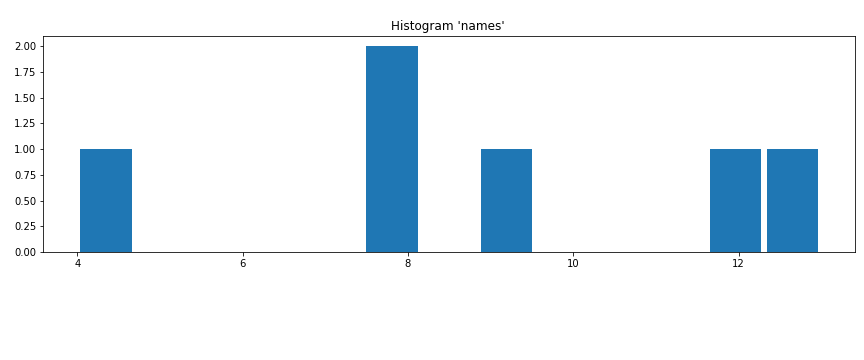
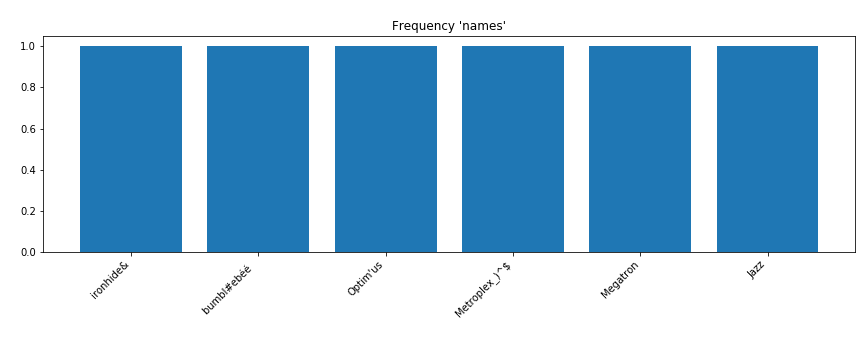

INFO:optimus:run() executed in 36.63 sec


In [70]:
op.profiler.run(df,"names")

In [31]:
 list(enumerate(buckets))

[(0, {'lower': 4, 'upper': 4.6923076923076925, 'bucket': 0}),
 (1, {'lower': 4.6923076923076925, 'upper': 5.384615384615385, 'bucket': 1}),
 (2, {'lower': 5.384615384615385, 'upper': 6.0769230769230775, 'bucket': 2}),
 (3, {'lower': 6.0769230769230775, 'upper': 6.76923076923077, 'bucket': 3}),
 (4, {'lower': 6.76923076923077, 'upper': 7.461538461538463, 'bucket': 4}),
 (5, {'lower': 7.461538461538463, 'upper': 8.153846153846155, 'bucket': 5}),
 (6, {'lower': 8.153846153846155, 'upper': 8.846153846153847, 'bucket': 6}),
 (7, {'lower': 8.846153846153847, 'upper': 9.538461538461538, 'bucket': 7}),
 (8, {'lower': 9.538461538461538, 'upper': 10.23076923076923, 'bucket': 8}),
 (9, {'lower': 10.23076923076923, 'upper': 10.923076923076922, 'bucket': 9}),
 (10,
  {'lower': 10.923076923076922, 'upper': 11.615384615384613, 'bucket': 10}),
 (11,
  {'lower': 11.615384615384613, 'upper': 12.307692307692305, 'bucket': 11}),
 (12, {'lower': 12.307692307692305, 'upper': 13, 'bucket': 12})]

In [ ]:
op.profiler.to_file("asdf")

In [149]:
assert(False)
print("asdafsd")

AssertionError: 

In [ ]:
import altair as alt
import pandas as pd
data = pd.DataFrame({'x': [1, 2, 3], 'y': [2, 1, 2]})

chart = alt.Chart(data).mark_line().encode(
     x='x',
     y='y'
)

from pprint import pprint
pprint(chart.to_dict())

In [8]:
url = 'data.json'
data.to_json(url, orient='records')

chart = alt.Chart(url).mark_line().encode(
    x='x:Q',
    y='y:Q'
)
pprint(chart.to_dict())

{'$schema': 'https://vega.github.io/schema/vega-lite/v3.2.1.json',
 'config': {'mark': {'tooltip': None}, 'view': {'height': 300, 'width': 400}},
 'data': {'url': 'data.json'},
 'encoding': {'x': {'field': 'x', 'type': 'quantitative'},
              'y': {'field': 'y', 'type': 'quantitative'}},
 'mark': 'line'}


In [9]:
import pandas as pd
data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})

In [10]:
alt.renderers.enable('notebook')
alt.Chart(data).mark_point().encode(
    x='a',
    y='b'
)


ValueError: 
To use the 'notebook' renderer, you must install the vega package
and the associated Jupyter extension.
See https://altair-viz.github.io/getting_started/installation.html
for more information.


In [14]:
!pip install altair
!pip install -U altair vega_datasets notebook vega

Requirement already up-to-date: altair in c:\users\argenisleon\anaconda3\lib\site-packages (3.0.0)
  Running setup.py bdist_wheel for vega: started
  Running setup.py bdist_wheel for vega: finished with status 'done'
  Stored in directory: C:\Users\argenisleon\AppData\Local\pip\Cache\wheels\34\63\c7\9995bff8bf741e0678564aa9ca97fb36e901a9768e913de708
Successfully built vega
  Found existing installation: notebook 5.7.4
    Uninstalling notebook-5.7.4:
      Successfully uninstalled notebook-5.7.4


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\ARGENI~1\\AppData\\Local\\Temp\\pip-uninstall-1y43x7fp\\users\\argenisleon\\anaconda3\\scripts\\jupyter-notebook.exe'
Consider using the `--user` option or check the permissions.

